In [70]:
import pandas as pd

df = pd.read_csv('merged.csv')
df.head(10)
df = df.dropna()
# df.isnull().sum()
# df.select_dtypes(include='float').columns
df['PPG'] = df['PTS']/df['GP']

df[df['PPG']>25].shape[1]

ast_leaders = df[['PLAYER_NAME','AST']].sort_values('AST',ascending=False).head(5)
ast_leaders
# df.columns
result_df = df[(df['AGE']<=25) & (df['FG3_PCT']>0.4)]
result_df = result_df[['PLAYER_NAME','AGE','FG3_PCT']]
result_df
# df.columns
team_pts = df[['TEAM_ABBREVIATION','PPG']].groupby('TEAM_ABBREVIATION').sum()
team_pts = team_pts.sort_values(by='PPG',ascending=False)
team_pts.head(5)

team_reb = df[['TEAM_ABBREVIATION','REB']].groupby('TEAM_ABBREVIATION').sum()

team_reb = team_reb.sort_values(by = 'REB',ascending=False)
team_reb.head(1)
df.columns
# position_salary = df


top_df = df[df['PPG']>15].sort_values(by='FG_PCT',ascending=False)
top_df = top_df[['PLAYER_NAME','PPG','FG_PCT']]
top_df.head()
df.columns

df['AST_TOV'] = df['AST']/df['TOV']
df[['PLAYER_NAME','AST_TOV']].sort_values(by = 'AST_TOV',ascending=False)

,PLAYER_NAME,AST_TOV
231,Jalen McDaniels,inf
84,Chris Duarte,9.000000
47,Bobi Klintman,7.000000
546,Tyrese Haliburton,5.608333
528,Tre Jones,5.485714
...,...,...
9,Adem Bona,0.442623
408,Moses Brown,0.181818
360,Leonard Miller,0.000000
439,P.J. Tucker,0.000000


In [101]:
import pandas as pd

salary_data = pd.read_csv('salaryData.csv')
player_data = pd.read_csv('merged.csv')

player_data.drop('2024-25',axis=1,inplace=True)
salary_data.rename(columns={'2024-25':'salary','player_id':'PLAYER_NAME'},inplace=True)
salary_data=salary_data[['PLAYER_NAME','salary']]
combined = pd.merge(player_data,salary_data,on='PLAYER_NAME')

combined[combined['PLAYER_NAME'].str.endswith('Green')]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,salary
118,203110,Draymond Green,Draymond,1610612744,GSW,35.0,68,42,26,0.618,...,337,562,73,183,48,79,93,20,91,"$24,107,143"
169,1630224,Jalen Green,Jalen,1610612745,HOU,23.0,82,52,30,0.634,...,569,434,38,13,84,29,116,44,20,"$12,483,048"
188,1629750,Javonte Green,Javonte,1610612739,CLE,31.0,68,24,44,0.353,...,268,341,224,290,517,262,281,44,270,"$2,087,519"
197,201145,Jeff Green,Jeff,1610612745,HOU,38.0,32,20,12,0.625,...,84,168,407,371,361,416,281,44,405,"$8,000,000"
223,1630182,Josh Green,Josh,1610612766,CHA,24.0,68,17,51,0.250,...,386,519,194,230,556,234,281,44,226,"$12,654,321"


C:\Users\amans\AppData\Local\Temp\ipykernel_33764\909490676.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2023-01-01", periods=12, freq='M')  # Monthly frequency


,sales,store,product_category
0,120,Store 1,A
1,150,Store 2,B
2,170,Store 1,A
3,160,Store 2,B
4,180,Store 1,C
5,190,Store 1,C
6,200,Store 2,B
7,210,Store 1,A
8,220,Store 2,B
10,270,Store 2,C


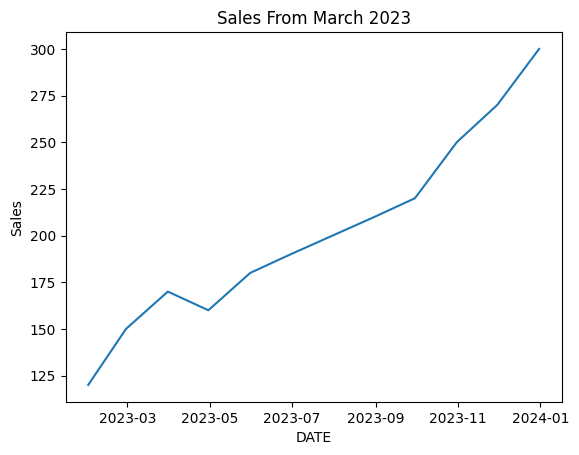

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Create a sample dataset with dates
date_range = pd.date_range(start="2023-01-01", periods=12, freq='M')  # Monthly frequency

data = {
    "date": date_range,
    "sales": [120, 150, 170, 160, 180, 190, 200, 210, 220, 250, 270, 300],
    "product_category": ['A', 'B', 'A', 'B', 'C', 'C', 'B', 'A', 'B', 'A', 'C', 'A'],
    "store": ['Store 1', 'Store 2', 'Store 1', 'Store 2', 'Store 1', 'Store 1', 'Store 2', 'Store 1', 'Store 2', 'Store 1', 'Store 2', 'Store 1'],
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df['date'] = pd.to_datetime(df['date'])
result_df = df[(df['date']>'2023-05')& (df['sales']>200)&((df['product_category']=='A')|(df['product_category']=='B'))]
result_df.head()

plt.plot(df['date'],df['sales'])
plt.title('Sales From March 2023')
plt.xlabel('DATE')
plt.ylabel('Sales')

df[['sales','store','product_category']].groupby('store').head()

In [ ]:
import plotly.express as px

# px.bar(df['date'],df['sales'])
px.line(df['date'],df['sales'])
px.label